<a href="https://colab.research.google.com/github/Xixaus/Nastroje/blob/main/Predikce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Knihovny a funkce { run: "auto", vertical-output: true }

try:
    from tensorflow_addons.metrics import F1Score
except:
    !pip install --quiet tensorflow_addons
    !git clone https://github.com/Xixaus/Nastroje.git
    !mkdir /content/input_data

import pandas as pd
import os
from IPython.display import clear_output
import numpy as np

import keras
from tensorflow.keras.models import load_model
from tensorflow_addons.metrics import F1Score
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

def GC_extract(data_file, plot=True):
    encoder = LabelEncoder()
    encoder.fit(['hruška', 'jablko', 'meruňka', 'třešeň', 'švestka'])
    df = pd.DataFrame()

    for file in os.listdir(data_file):
        data = pd.read_csv(f"{data_file}/{file}", names=[file], usecols=[1])
        df = pd.concat([df, data], axis=1)

    dff = MinMaxScaler().fit_transform(np.log10(df.T.iloc[:,5000:39600]).T).T
    x = df.index / 1200

    prediction = model.predict(dff)

    for i in range(len(prediction)):
        print(df.columns[i][0:-4])

        for category, probability in zip(encoder.classes_, prediction[i]):
            print(f'{category}: {probability:.2f} ', end="")

        if plot == True:
            plt.plot(x, np.log(df.iloc[:,i]))
            plt.xlabel('Čas [min]')
            plt.ylabel('Zlogaritmovaná odezva')
            plt.show()

        print()


F1_score = F1Score(num_classes=5, threshold = 0.5, average='macro')
model = load_model("/content/Nastroje/model/classification_model.h5")

clear_output()

model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 34600, 1)          0         
                                                                 
 gaussian_noise (GaussianNo  (None, 34600, 1)          0         
 ise)                                                            
                                                                 
 conv1d (Conv1D)             (None, 8650, 14)          924       
                                                                 
 batch_normalization (Batch  (None, 8650, 14)          56        
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 4325, 14)          0         
 D)                                                              
                                                             

1/1 [==============================] - 0s 27ms/step
MARS4
hruška: 0.99 jablko: 0.00 meruňka: 0.00 třešeň: 0.00 švestka: 0.00 

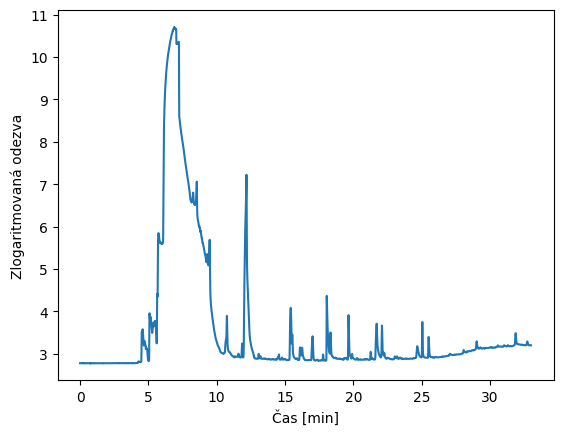


MARS3
hruška: 0.98 jablko: 0.00 meruňka: 0.00 třešeň: 0.00 švestka: 0.01 

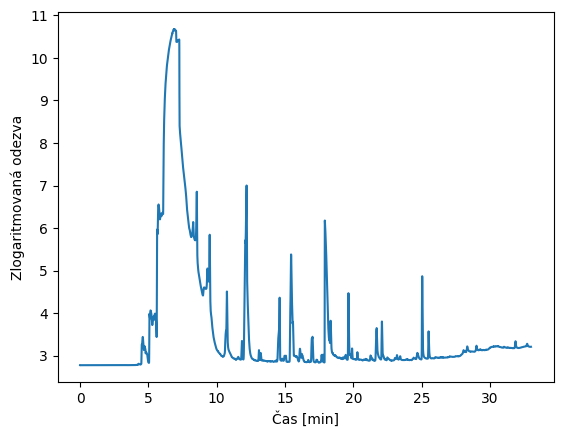

In [ ]:
GC_extract("/content/input_data", plot=True)